# Linear Regression in statsmodels (Practice)

## Note: Second phase of the project is at the bottom

### Task: Run a linear regression with statsmodels predict the price of a car.
Note: you will be revisiting this task for a later assignment, so you will want to create a new GitHub repository for your work.

- Dataset Link:  https://www.kaggle.com/datasets/hellbuoy/car-price-prediction 
    - Download and save in repo,
Steps to Perform:
- Perform initial preprocessing of data
- Perform preprocessing for statsmodels
- Run the model in statsmodels and produce a results summary
- Evaluate the model on the test set


In [39]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.metrics import r2_score, mean_squared_error

## Standard Statsmodels import
import statsmodels.api as sm


### Initial data processing

In [3]:
## load data
file="Data/archive (1)/CarPrice_Assignment.csv"
df = pd.read_csv(file)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [4]:
## checking for null values
df.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [5]:
df.drop(columns='car_ID')

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


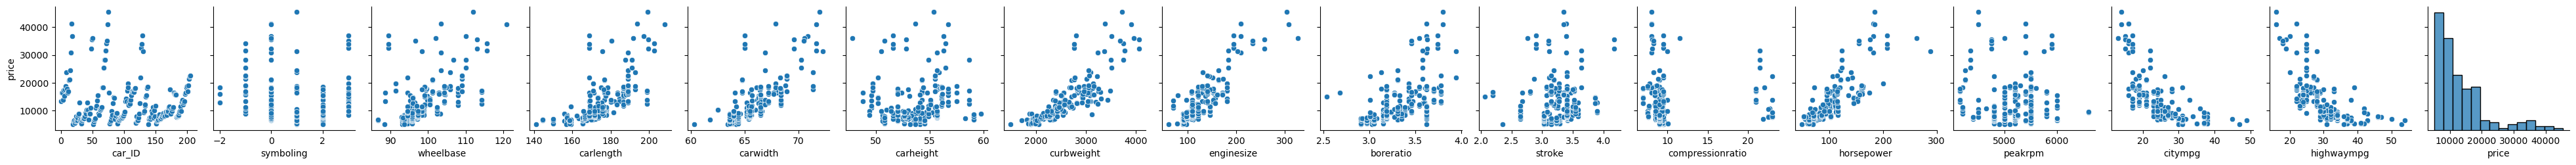

In [6]:
## Quick EDA for cols related to target
sns.pairplot(df,y_vars='price');

In [9]:
## Make x and y variables
y = df['price'].copy()
X = df.drop(columns=['price']).copy()
X_train,X_test, y_train, y_test = train_test_split(X,y, random_state=42)
X_train.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
90,91,1,nissan gt-r,diesel,std,two,sedan,fwd,front,94.5,...,four,103,idi,2.99,3.47,21.9,55,4800,45,50
173,174,-1,toyota corolla,gas,std,four,sedan,fwd,front,102.4,...,four,122,mpfi,3.31,3.54,8.7,92,4200,29,34
93,94,1,nissan titan,gas,std,four,wagon,fwd,front,94.5,...,four,97,2bbl,3.15,3.29,9.4,69,5200,31,37
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25
167,168,2,toyota corona liftback,gas,std,two,hardtop,rwd,front,98.4,...,four,146,mpfi,3.62,3.50,9.3,116,4800,24,30


### Proprocess for statsmodels

In [11]:
## make cat selector and using it to save list of column names
cat_select = make_column_selector(dtype_include='object')
cat_cols = cat_select(X_train)
cat_cols

['CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

In [12]:
## make num selector and using it to save list of column names
num_select = make_column_selector(dtype_include='number')
num_cols = num_select(X_train)
num_cols

['car_ID',
 'symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg']

In [13]:
## make pipelines
cat_pipe = make_pipeline(SimpleImputer(strategy='constant',
                                       fill_value='MISSING'),
                         OneHotEncoder(handle_unknown='ignore', sparse=False))
num_pipe = make_pipeline(SimpleImputer(strategy='mean'),#StandardScaler()
                        )
preprocessor = make_column_transformer((cat_pipe,cat_cols),
                                        (num_pipe, num_cols), remainder='passthrough')

In [14]:
## fit the col transformer
preprocessor.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['CarName', 'fueltype', 'aspiration',
                                  'doornumber', 'carbody', 'drivewheel',
                                  'enginelocation', 'enginetype',
                                  'cylindernumber', 'fuelsystem']),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer())]),
                                 ['car_ID', 'symboling', 'wheelbase',
                                  'carlength', 'carwidth', 'carheight',
                                  'curbweight', 'enginesize', 'boreratio',
                                  'stroke', 'compressionratio', 'horsepower',
                                  'peakrpm', 'citympg', 'highwaympg'])])

In [16]:
# Get feature names

## Create the empty list
final_features = []

In [17]:
## Finding the categorical pipeline in our col transformer.
preprocessor.named_transformers_['pipeline-1']

Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='MISSING', strategy='constant')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [18]:
## A) Using named steps dictionary to find the encoder - Part 1
preprocessor.named_transformers_['pipeline-1'].named_steps

{'simpleimputer': SimpleImputer(fill_value='MISSING', strategy='constant'),
 'onehotencoder': OneHotEncoder(handle_unknown='ignore', sparse=False)}

In [19]:
## A) Using named steps dictionary to find the encoder - Part 2
ohe_step = preprocessor.named_transformers_['pipeline-1'].named_steps['onehotencoder']

In [20]:
## Now, get OHE feature names
cat_features = ohe_step.get_feature_names_out(cat_cols)
cat_features

array(['CarName_Nissan versa', 'CarName_alfa-romero Quadrifoglio',
       'CarName_alfa-romero giulia', 'CarName_alfa-romero stelvio',
       'CarName_audi 100 ls', 'CarName_audi 100ls', 'CarName_audi 4000',
       'CarName_audi 5000', 'CarName_audi fox', 'CarName_bmw 320i',
       'CarName_bmw x1', 'CarName_bmw x3', 'CarName_bmw z4',
       'CarName_buick opel isuzu deluxe',
       'CarName_buick regal sport coupe (turbo)', 'CarName_buick skyhawk',
       'CarName_buick skylark', 'CarName_chevrolet vega 2300',
       'CarName_dodge challenger se', 'CarName_dodge colt (sw)',
       'CarName_dodge coronet custom', 'CarName_dodge d200',
       'CarName_dodge dart custom', 'CarName_dodge rampage',
       'CarName_honda accord', 'CarName_honda accord cvcc',
       'CarName_honda accord lx', 'CarName_honda civic',
       'CarName_honda civic (auto)', 'CarName_honda civic 1500 gl',
       'CarName_honda civic cvcc', 'CarName_honda prelude',
       'CarName_isuzu D-Max ', 'CarName_isuzu MU-X'

In [21]:
## Add the categorical feature names to our final_features list
final_features.extend(cat_features)
final_features

['CarName_Nissan versa',
 'CarName_alfa-romero Quadrifoglio',
 'CarName_alfa-romero giulia',
 'CarName_alfa-romero stelvio',
 'CarName_audi 100 ls',
 'CarName_audi 100ls',
 'CarName_audi 4000',
 'CarName_audi 5000',
 'CarName_audi fox',
 'CarName_bmw 320i',
 'CarName_bmw x1',
 'CarName_bmw x3',
 'CarName_bmw z4',
 'CarName_buick opel isuzu deluxe',
 'CarName_buick regal sport coupe (turbo)',
 'CarName_buick skyhawk',
 'CarName_buick skylark',
 'CarName_chevrolet vega 2300',
 'CarName_dodge challenger se',
 'CarName_dodge colt (sw)',
 'CarName_dodge coronet custom',
 'CarName_dodge d200',
 'CarName_dodge dart custom',
 'CarName_dodge rampage',
 'CarName_honda accord',
 'CarName_honda accord cvcc',
 'CarName_honda accord lx',
 'CarName_honda civic',
 'CarName_honda civic (auto)',
 'CarName_honda civic 1500 gl',
 'CarName_honda civic cvcc',
 'CarName_honda prelude',
 'CarName_isuzu D-Max ',
 'CarName_isuzu MU-X',
 'CarName_jaguar xf',
 'CarName_jaguar xj',
 'CarName_jaguar xk',
 'CarName_

In [22]:
num_cols

['car_ID',
 'symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg']

In [23]:
## adding the numeric features which were passed through the model
final_features.extend(num_cols)
final_features

['CarName_Nissan versa',
 'CarName_alfa-romero Quadrifoglio',
 'CarName_alfa-romero giulia',
 'CarName_alfa-romero stelvio',
 'CarName_audi 100 ls',
 'CarName_audi 100ls',
 'CarName_audi 4000',
 'CarName_audi 5000',
 'CarName_audi fox',
 'CarName_bmw 320i',
 'CarName_bmw x1',
 'CarName_bmw x3',
 'CarName_bmw z4',
 'CarName_buick opel isuzu deluxe',
 'CarName_buick regal sport coupe (turbo)',
 'CarName_buick skyhawk',
 'CarName_buick skylark',
 'CarName_chevrolet vega 2300',
 'CarName_dodge challenger se',
 'CarName_dodge colt (sw)',
 'CarName_dodge coronet custom',
 'CarName_dodge d200',
 'CarName_dodge dart custom',
 'CarName_dodge rampage',
 'CarName_honda accord',
 'CarName_honda accord cvcc',
 'CarName_honda accord lx',
 'CarName_honda civic',
 'CarName_honda civic (auto)',
 'CarName_honda civic 1500 gl',
 'CarName_honda civic cvcc',
 'CarName_honda prelude',
 'CarName_isuzu D-Max ',
 'CarName_isuzu MU-X',
 'CarName_jaguar xf',
 'CarName_jaguar xj',
 'CarName_jaguar xk',
 'CarName_

In [32]:
len(final_features)

170

In [34]:
len(y)

205

In [24]:
X_train_df = pd.DataFrame( preprocessor.transform(X_train), columns=final_features, index=X_train.index)
X_train_df.head()

,CarName_Nissan versa,CarName_alfa-romero Quadrifoglio,CarName_alfa-romero giulia,CarName_alfa-romero stelvio,CarName_audi 100 ls,CarName_audi 100ls,CarName_audi 4000,CarName_audi 5000,CarName_audi fox,CarName_bmw 320i,...,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,54.5,2017.0,103.0,2.99,3.47,21.9,55.0,4800.0,45.0,50.0
173,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,54.9,2326.0,122.0,3.31,3.54,8.7,92.0,4200.0,29.0,34.0
93,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,53.5,2024.0,97.0,3.15,3.29,9.4,69.0,5200.0,31.0,37.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,53.1,2507.0,136.0,3.19,3.40,8.5,110.0,5500.0,19.0,25.0
167,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,52.0,2540.0,146.0,3.62,3.50,9.3,116.0,4800.0,24.0,30.0


In [25]:
X_test_df = pd.DataFrame(preprocessor.transform(X_test), columns=final_features, index=X_test.index)
X_test_df.head()

,CarName_Nissan versa,CarName_alfa-romero Quadrifoglio,CarName_alfa-romero giulia,CarName_alfa-romero stelvio,CarName_audi 100 ls,CarName_audi 100ls,CarName_audi 4000,CarName_audi 5000,CarName_audi fox,CarName_bmw 320i,...,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,55.7,3230.0,209.0,3.62,3.39,8.00,182.0,5400.0,16.0,22.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,52.0,3053.0,131.0,3.13,3.40,7.00,160.0,5500.0,16.0,22.0
100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,54.7,2302.0,120.0,3.33,3.47,8.50,97.0,5200.0,27.0,34.0
132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,56.1,2658.0,121.0,3.54,3.07,9.31,110.0,5250.0,21.0,28.0
68,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,58.7,3750.0,183.0,3.58,3.64,21.50,123.0,4350.0,22.0,25.0


In [27]:
## Demo of adding a constant to X_train (not rewriting the df yet-confirming expected results first)
sm.add_constant(X_train_df, prepend=False, has_constant='add').head()

,CarName_Nissan versa,CarName_alfa-romero Quadrifoglio,CarName_alfa-romero giulia,CarName_alfa-romero stelvio,CarName_audi 100 ls,CarName_audi 100ls,CarName_audi 4000,CarName_audi 5000,CarName_audi fox,CarName_bmw 320i,...,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,const
90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2017.0,103.0,2.99,3.47,21.9,55.0,4800.0,45.0,50.0,1.0
173,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2326.0,122.0,3.31,3.54,8.7,92.0,4200.0,29.0,34.0,1.0
93,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2024.0,97.0,3.15,3.29,9.4,69.0,5200.0,31.0,37.0,1.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,2507.0,136.0,3.19,3.40,8.5,110.0,5500.0,19.0,25.0,1.0
167,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2540.0,146.0,3.62,3.50,9.3,116.0,4800.0,24.0,30.0,1.0


In [28]:
## Overwrite 
X_train_df = sm.add_constant(X_train_df,has_constant='add', prepend=False)
X_test_df = sm.add_constant(X_test_df,has_constant='add', prepend=False)
display(X_train_df.head(2), X_test_df.head(2))

,CarName_Nissan versa,CarName_alfa-romero Quadrifoglio,CarName_alfa-romero giulia,CarName_alfa-romero stelvio,CarName_audi 100 ls,CarName_audi 100ls,CarName_audi 4000,CarName_audi 5000,CarName_audi fox,CarName_bmw 320i,...,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,const
90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2017.0,103.0,2.99,3.47,21.9,55.0,4800.0,45.0,50.0,1.0
173,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2326.0,122.0,3.31,3.54,8.7,92.0,4200.0,29.0,34.0,1.0


,CarName_Nissan versa,CarName_alfa-romero Quadrifoglio,CarName_alfa-romero giulia,CarName_alfa-romero stelvio,CarName_audi 100 ls,CarName_audi 100ls,CarName_audi 4000,CarName_audi 5000,CarName_audi fox,CarName_bmw 320i,...,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,const
15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3230.0,209.0,3.62,3.39,8.0,182.0,5400.0,16.0,22.0,1.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3053.0,131.0,3.13,3.40,7.0,160.0,5500.0,16.0,22.0,1.0


### Run the model in statsmodels and produce a results summary

In [29]:
model = sm.OLS(y_train, X_train_df, hasconst=True)

In [30]:
# Fitting the model (no data in .fit) and saving the result as new var
result = model.fit()

In [31]:
## get model performance metrics
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     17.02
Date:                Wed, 18 Jan 2023   Prob (F-statistic):            0.00229
Time:                        15:30:49   Log-Likelihood:                -1114.2
No. Observations:                 153   AIC:                             2524.
Df Residuals:                       5   BIC:                             2973.
Df Model:                         147                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
CarName_Nissan versa                     1113.7348   5907.738      0.189      0.858   -1.41e+04    1.63e+04
CarName_alfa-romero Quadrifoglio         2.927e+04    1.9e+04      1.540      0.184   -1.96e+04    7.81e+04
CarName_alfa-romero giulia               2.698e+04   2.24e+04      1.205      0.282   -3.06e+04    8.45e+04
CarName_alfa-romero stelvio               2.97e+04   2.22e+04      1.338      0.238   -2.73e+04    8.67e+04
CarName_audi 100 ls                      3.036e+04   2.08e+04      1.459      0.204   -2.31e+04    8.39e+04
CarName_audi 100ls                       2720.5538   5730.270      0.475      0.655    -1.2e+04    1.75e+04
CarName_audi 4000                        4181.2659   7761.753      0.539      0.613   -1.58e+04    2.41e+04
CarName_audi 5000                        4118.5083   6275.878      0.656      0.541    -1.2e+04    2.03e+04
CarName_audi fox                         4946.8987   1.18e+04      0.418      0.693   -2.55e+04    3.54e+04
CarName_bmw 320i                         3.419e+04   1.98e+04      1.729      0.144   -1.66e+04     8.5e+04
CarName_bmw x1                           4.618e+04   2.14e+04      2.162      0.083   -8734.026    1.01e+05
CarName_bmw x3                            4.58e+04   2.16e+04      2.117      0.088   -9805.544    1.01e+05
CarName_bmw z4                           4.374e+04   2.29e+04      1.908      0.115   -1.52e+04    1.03e+05
CarName_buick opel isuzu deluxe          1624.9580   8040.005      0.202      0.848    -1.9e+04    2.23e+04
CarName_buick regal sport coupe (turbo)  1.384e+04   1.07e+04      1.295      0.252   -1.36e+04    4.13e+04
CarName_buick skyhawk                   -2774.8773   1.31e+04     -0.212      0.840   -3.64e+04    3.08e+04
CarName_buick skylark                   -7205.3271   6754.101     -1.067      0.335   -2.46e+04    1.02e+04
CarName_chevrolet vega 2300              1.902e+04   1.51e+04      1.261      0.263   -1.97e+04    5.78e+04
CarName_dodge challenger se              1.977e+04   1.45e+04      1.362      0.231   -1.76e+04    5.71e+04
CarName_dodge colt (sw)                  1.719e+04   1.62e+04      1.059      0.338   -2.45e+04    5.89e+04
CarName_dodge coronet custom             1.758e+04   1.71e+04      1.031      0.350   -2.63e+04    6.14e+04
CarName_dodge d200                       1.995e+04   1.72e+04      1.159      0.299   -2.43e+04    6.42e+04
CarName_dodge dart custom                2.071e+04   1.57e+04      1.315      0.246   -1.98e+04    6.12e+04
CarName_dodge rampage                    1.755e+04   1.41e+04      1.244      0.269   -1.87e+04    5.38e+04
CarName_honda accord                     1.741e+04   1.67e+04      1.046      0.344   -2.54e+04    6.02e+04
CarName_honda accord cvcc                1.574e+04   1.48e+

### Evaluate the model on the train set

The r-squared is a solid .998 which indicates a good fit.  However, the adj. R-squared drops to .939 indicating that we have too many features for the given number of data points.  We have 170 features and 205 data points.  The regression also suffers from significant multicollinearity.  All of the p-values are significantly greater than .05.

Suggestion - eliminate data and re-run regression.  A good place to start would be to examine the OHE data and see if every car model needs to be OHE.  Then look at the correlation between features and eliminate one of each that are highly correlated. After, perhaps looks at the values with the highest p-values and eliminate them one by one.

### Evaluate the model on the test set


In [40]:
## Fit an OLS model
model = sm.OLS(y_train,X_train_df)
result = model.fit()
## Use the result (not the model) to .predict
test_preds = result.predict(X_test_df)

In [41]:
# e.g. r2_score, mean_squared_error
test_r2 = r2_score(y_test, test_preds)
test_mse = mean_squared_error(y_test, test_preds)

# Now that we have saved our metrics, we will want to report the scores in a clean, easy-to-read print statement. We can use f-strings to do this!

print(f'The testing r-square value is {test_r2} and the testing mean squared error is {test_mse}.')

The testing r-square value is -2.406162945018837 and the testing mean squared error is 230459407.40272605.


As you can see, the test r-squared value is absolutely terrible!  This clearly way overfit the train data

# Diagnosing Your Regression Model (Practice)

- Now that you've learned about the assumptions of Linear Regression and how to check them, revisit your model from the Linear Regression in statsmodles assignment and test if your regression meets the assumption.
    - In a markdown cell below your results, summarize what assumptions the model did and/or did not meet. 
- If you model did not meet the assumptions, then iterate on the model and add/change any preprocessing needed to improve its performance. 

Submit your GitHub respitory link with your work.

# Checking assumptions of linear regression

## Assumption of normality


In [43]:
# To get our residuals from statsmodels and preview first 5
resid = result.resid
resid.head()

90    -2.414345e-08
173   -9.535824e+01
93    -6.806476e-08
5     -2.273555e-08
167   -9.398536e-08
dtype: float64

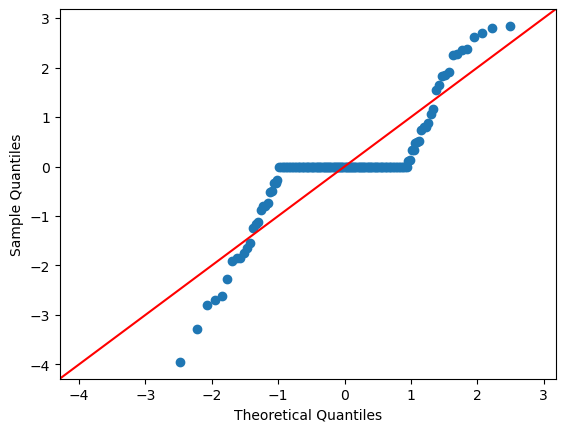

In [44]:
sm.graphics.qqplot(resid,line='45',fit=True);

## Assumption of homoscedasticity

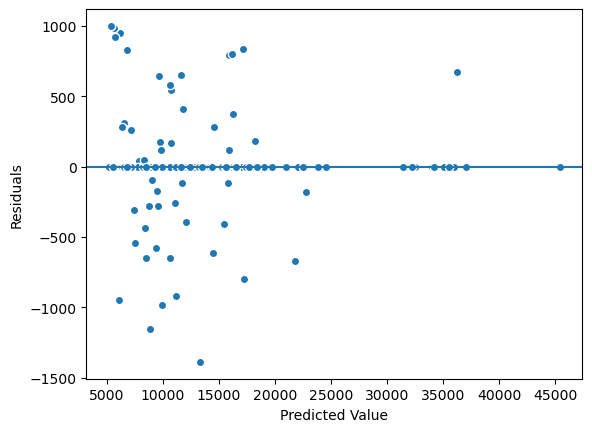

In [46]:
## Get predictions and calculate residuals
y_pred = result.predict(X_train_df)
resid = y_train -  y_pred
## Plot predicitons vs resids
fig, ax = plt.subplots()
ax.scatter(y_pred,resid,ec='white',lw=1)
ax.axhline(0)
ax.set(ylabel='Residuals',xlabel='Predicted Value');

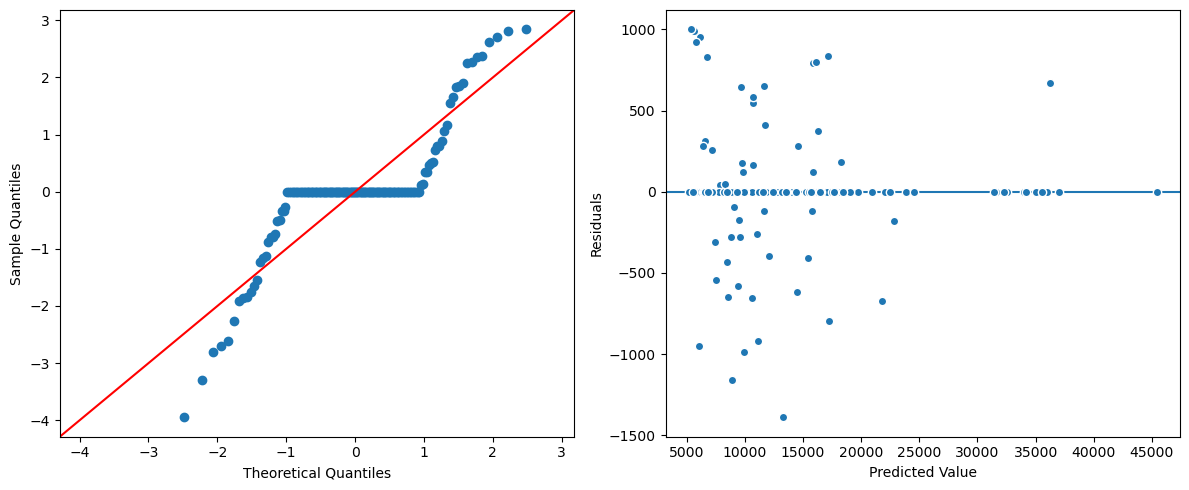

In [47]:
def evaluate_ols(result,X_train_df, y_train):
    """Plots a Q-Q Plot and residual plot for a statsmodels OLS regression.
    """
    
    ## save residuals from result
    y_pred = result.predict(X_train_df)
    resid = y_train - y_pred
    
    fig, axes = plt.subplots(ncols=2,figsize=(12,5))
    
    ## Normality 
    sm.graphics.qqplot(resid,line='45',fit=True,ax=axes[0]);
    
    ## Homoscedasticity
    ax = axes[1]
    ax.scatter(y_pred, resid, edgecolor='white',lw=1)
    ax.axhline(0,zorder=0)
    ax.set(ylabel='Residuals',xlabel='Predicted Value');
    plt.tight_layout()
    
evaluate_ols(result,X_train_df, y_train)

## Remove columns with insignificant P-Values

In [48]:
## save p-values
p_vals = result.pvalues
## filter for p_values that are >.05
p_vals[p_vals>.05]

CarName_Nissan versa                0.857881
CarName_alfa-romero Quadrifoglio    0.184264
CarName_alfa-romero giulia          0.282089
CarName_alfa-romero stelvio         0.238422
CarName_audi 100 ls                 0.204354
                                      ...   
horsepower                          0.819269
peakrpm                             0.575785
citympg                             0.622833
highwaympg                          0.655754
const                               0.653970
Length: 171, dtype: float64

Literally every column has an insignificant p-value!